In [1]:
import sys
import os
sys.path.append(os.path.join(os.path.realpath('../'),'scripts'))
from plotparams import *
from hhg_analysis import *
from sfa_analysis import *
from tdci_analysis import *
from qprop_analysis import *

In [84]:
from plotparams import *
_path2images='../simulating_hhg_with_gaussian_basis_sets/images/'

def plot_hhg_method_comp(sae_path, tdci_path, tdci_job, spectrum_file,
                        params = [0.0569, 20, 400],
                        xlim = [0.1, 90], ylim = [-18,20],
                        figsize = [7.2, 6.0], fontsize=18,
                        text_pos=[0.75, 0.88], legend_pos=[0.75, 0.73],
                        savefig=True, imgtype='pdf', return_data=False, plot_label='method'):
    freq_sae, Glist_sae = get_sae_hhg_spectra(sae_path)
    tdci_data = get_tdci_data(tdci_path, tdci_job, method='rk4')
    data_info = tdci_data['info']
    atom = data_info['atom']
    w0 = data_info['w0']
    ip = data_info['ip']
    ecut = data_info['e_cutoff']
    intensity = data_info['intensity']
    Glist_tdci = [tdci_data['lt_rk4_tdprop.txt']['hhg_dip'],
                tdci_data['lt_rk4_tdprop.txt']['hhg_vel'], 
                tdci_data['lt_rk4_tdprop.txt']['hhg_acc']]
    freq_tdci = tdci_data['lt_rk4_tdprop.txt']['ho']*w0
    # freq_sfa, Glist_sfa = get_sfa_hhg_spectra(dipole_file, params)
    freq_sfa, hhg_sfa = read_spectra(spectrum_file, params)
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(freq_sfa/w0, np.log10(hhg_sfa)+0, label='SFA', alpha=0.75, linewidth=1.50, color='darkred')
    ax.plot(freq_sae/w0, np.log10(Glist_sae[0])+10, label='SAE', alpha=1.0, linewidth=1.2, color='darkorange')
    ax.plot(freq_tdci/w0, np.log10(Glist_tdci[0])+20, label='TD-CIS/aQZ+(4,4,0)', alpha=.65, linewidth=1.10, color='darkgreen')
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.axvline(ip/w0, color='grey', linestyle='dotted', linewidth=1.0)
    ax.axvline(ecut/w0, color='grey', linestyle='dashed', linewidth=0.85, alpha=0.6)
    ax.text(*text_pos, ('$\cdots\cdots$ \ $I_p$ \ \ \  : {ionp: 3.4f} E$_h$ \n'+
                '$--$ \ E$_\mathbf{cut}$ : {e_cutoff:3.4f} E$_h$\n').format(cut='{cut}',ionp=ip, e_cutoff=ecut),
                horizontalalignment='center',
                verticalalignment='center',
                transform = ax.transAxes, fontsize=fontsize-2)
    ax.legend(bbox_to_anchor=legend_pos, loc='center', ncol=1, fontsize=fontsize-3, facecolor='white')
    ax.set_xlabel('Harmonic order (N)', fontsize=fontsize+2)
    ax.set_ylabel('log$_{10}$(I$_\mathbf{HHG}$)', fontsize=fontsize+2)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='major', width=0.9, length=8, direction='out')
    ax.tick_params(which='minor', width=.3, length=4, direction='out')
    ax.tick_params(axis='both', labelsize=fontsize+2)
    fig.tight_layout()
    if savefig:
        filename = '{path2images}{atom}_{intensity}_{label}_hhg_comp.{imgtype}'.format(path2images=_path2images,atom=atom, label=plot_label, intensity=intensity,imgtype=imgtype)
        plt.savefig(filename, dpi=1000, format=imgtype)
    if return_data:
        return fig, ax



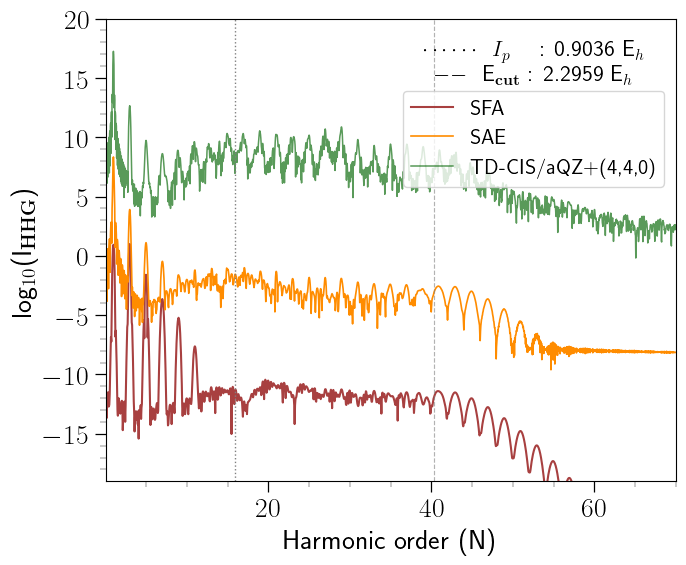

In [103]:
sae_path = '../data/qprop/helium_2E14/dat/' 
tdci_path = '../data/tdci/helium/he_aqz_440_cis_crt'
tdci_job = 'zs_2E14_54fs_800nm'
# sfa data
dipole_file = '../data/sfa/he_20cyc_800nm_2e14_npc400_dipole.txt'
spectrum_file = '../data/sfa/he_20cyc_800nm_2e14_npc400_spectrum.txt'

plot_hhg_method_comp(sae_path, tdci_path, tdci_job, spectrum_file, ylim=[-19,20], xlim=[0.1, 70], legend_pos=[0.75, .74])

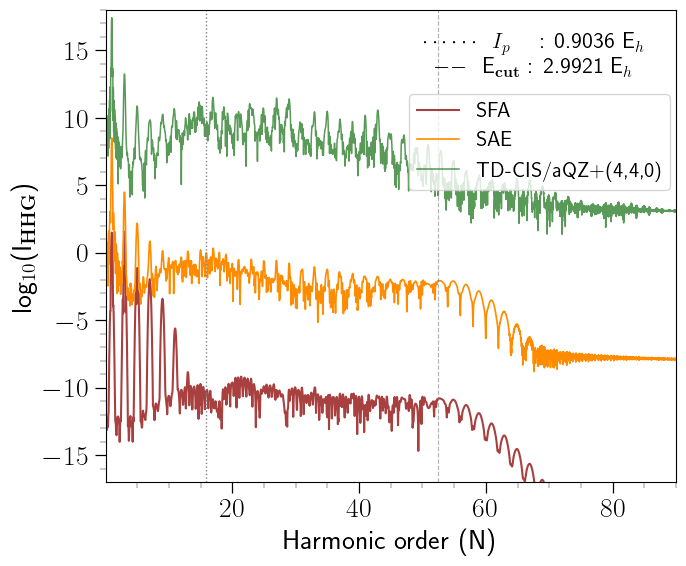

In [95]:
sae_path = '../data/qprop/helium_3E14/dat/' 
tdci_path = '../data/tdci/helium/he_aqz_440_cis_crt'
tdci_job = 'zs_3E14_54fs_800nm'
# sfa data
dipole_file = '../data/sfa/he_20cyc_800nm_3e14_npc400_dipole.txt'
spectrum_file = '../data/sfa/he_20cyc_800nm_3e14_npc400_spectrum.txt'

plot_hhg_method_comp(sae_path, tdci_path, tdci_job, spectrum_file, xlim=[0.1, 90], ylim=[-17,18], legend_pos=[0.76, 0.72])

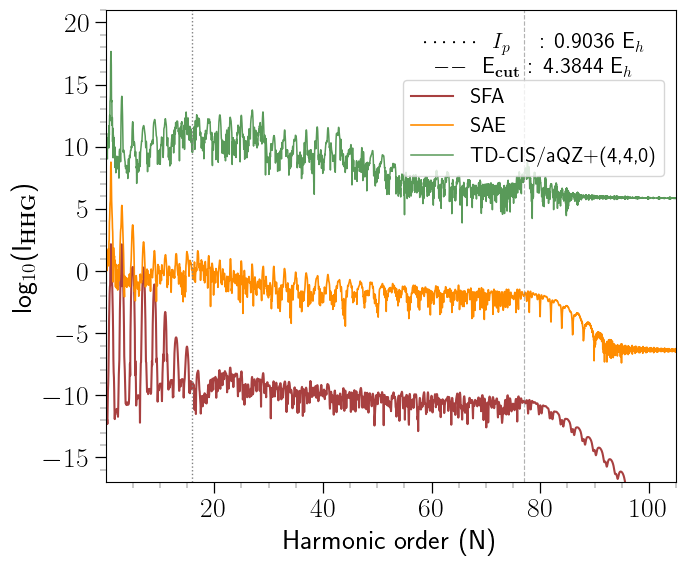

In [93]:
sae_path = '../data/qprop/helium_5E14/dat/' 
tdci_path = '../data/tdci/helium/he_aqz_440_cis_crt'
tdci_job = 'zs_5E14_54fs_800nm'
# sfa data
dipole_file = '../data/sfa/he_20cyc_800nm_5e14_npc400_dipole.txt'
spectrum_file = '../data/sfa/he_20cyc_800nm_5e14_npc400_spectrum.txt'
plot_hhg_method_comp(sae_path, tdci_path, tdci_job, spectrum_file, xlim=[0.1, 105], ylim=[-17,21], legend_pos=[0.75, .75])